# Uncertainty-Aware Spam Classification using Naive Bayes

###### Uncertainty in real-time decision making: This is a Spam classifier applying Bayesian principles that predicts whether a message is spam or not, and it also quantifies the level of uncertainty in its predictions. 

In [66]:
# STEP 1: IMPORT LIBRARIES 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ( 
    accuracy_score,
    confusion_matrix, 
    ConfusionMatrixDisplay,
    classification_report, 
    RocCurveDisplay
) 
import matplotlib.pyplot as plt

In [67]:
# STEP 2: LOAD AND PREPROCESS DATA
df = pd.read_csv("spam.csv", encoding ='latin-1') [['v1', 'v2']]
df.columns = ['label', 'message'] #Renaming the columns 
df['label_num'] = df.label.map({'ham':0, 'spam':1})

In [69]:
# STEP 3: SPLIT DATA 
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42)

In [70]:
# STEP 4: VECTORIZATION 
vectorizer = CountVectorizer() 
X_train_vec = vectorizer.fit_transform(X_train) 
X_test_vec = vectorizer.transform(X_test) 

In [72]:
# STEP 5: TRAIN THE MODEL 
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [73]:
# STEP 6: PREDICT LABELS AND PROBABILITIES 
y_pred = model.predict(X_test_vec)
y_prob = model.predict_proba(X_test_vec) [:,1]

In [77]:
# STEP 7: ACCURACY 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 98.39%


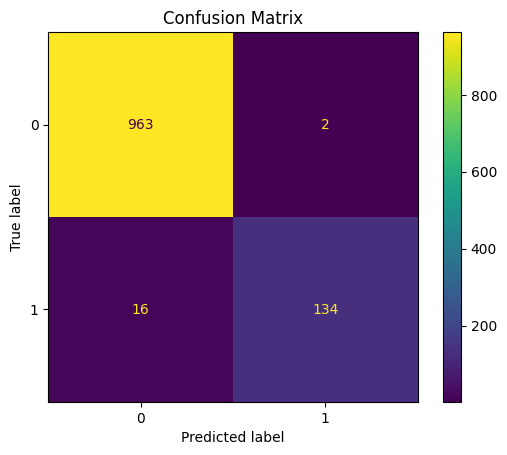

In [80]:
# STEP 8: CONFUSION MATRIX
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

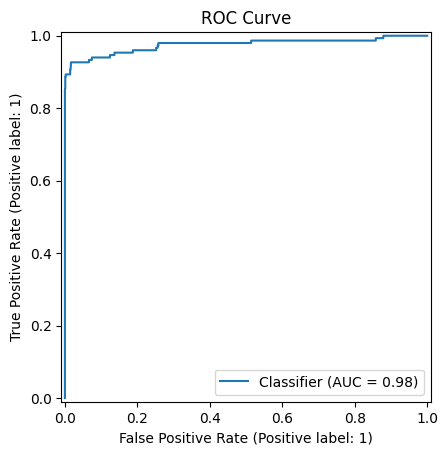

In [81]:
# Step 9: ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")
plt.show()